# Table of Contents
<div class="toc" style="margin-top: 1em;">
   <ul class="toc-item" id="toc-level0">
<!--       <li><span><a href="#Overview" data-toc-modified-id="Overview"><span class="toc-item-num">I.&nbsp;&nbsp;</span>Overview of Tutorial</a></span></li> -->
      <li><span><a href="#Part-1" data-toc-modified-id="Part-1"><span class="toc-item-num">II.&nbsp;&nbsp;</span>Part 1</a></span></li>
      <ul class="toc-item" id="toc-level1">
<!--          <li><span><a href="#Jupyter-Notebooks" data-toc-modified-id="Jupyter-Notebooks"><span class="toc-item-num">1.&nbsp;&nbsp;</span>Jupyter Notebooks</a></span></li> -->
         <li>
            <span><a href="#API-Overview" data-toc-modified-id="API-Overview-1"><span class="toc-item-num">2.&nbsp;&nbsp;</span>API Overview</a></span>
            <ul class="toc-item">
               <li><span><a href="#Context" data-toc-modified-id="Context-1.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Context</a></span></li>
               <li><span><a href="#Creating-a-ClipperConnection" data-toc-modified-id="Create-a-ClipperConnection-1.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Creating a ClipperConnection</a></span></li>
               <li><span><a href="#Starting-Clipper" data-toc-modified-id="Starting-Clipper-1.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Starting Clipper</a></span></li>
               <li>
                  <span><a href="#Deploying-a-model" data-toc-modified-id="Deploying-a-model-1.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Deploying a model</a></span>
                  <ul class="toc-item">
                     <li>
                        <span><a href="#Creating-a-model" data-toc-modified-id="Create-the-model-1.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Creating a model</a></span>
                     </li>
                     <li><span><a href="#Deploying-to-Clipper" data-toc-modified-id="Deploying-to-Clipper-1.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Deploying to Clipper</a></span></li>
                     <li><span><a href="#A-Note-About-Types-[Optional]" data-toc-modified-id="A-Note-About-Types-[Optional]-1.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>A Note About Types [Optional]</a></span></li>
                  </ul>
               </li>
               <li><span><a href="#Registering-an-Application" data-toc-modified-id="Registering-an-Application-1.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Registering an Application</a></span></li>
               <li><span><a href="#Inspecting-Clipper" data-toc-modified-id="Inspecting-Clipper-1.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Inspecting Clipper</a></span></li>
               <li><span><a href="#Updating-the-Model" data-toc-modified-id="Updating-the-Model-1.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Updating the Model</a></span></li>
               <li><span><a href="#Adding-Model-Replicas" data-toc-modified-id="Adding-Model-Replicas-1.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Adding Model Replicas</a></span></li>
            </ul>
         </li>
      </ul>
   </ul>
      <ul class="toc-item" id="toc-level00">
<!--           <li><span><a href="#Part-2" data-toc-modified-id="Part 2"><span class="toc-item-num">III.&nbsp;&nbsp;</span>Part 2</a></span></li>
         <ul class="toc-item" id="toc-level11">
            <li>
               <span><a href="#Example-Application---Image-Classification" data-toc-modified-id="Example-Application---Image-Classification"><span class="toc-item-num">3.&nbsp;&nbsp;</span>Example Application - Image Classification</a></span>
            <li><span><a href="#Example-Application---Custom-Docker-Containers" data-toc-modified-id="Example-Application---Custom-Docker-Containers"><span class="toc-item-num">4.&nbsp;&nbsp;</span>Example Application - Custom Docker Containers</a></span></li>
            <li><span><a href="#Restarting-Clipper" data-toc-modified-id="Restarting-Clipper"><span class="toc-item-num">5.&nbsp;&nbsp;</span>Restarting Clipper</a></span></li>
         </ul> -->
      </ul>
</div>

<a id='api_overview'></a>
## API Overview

In the first part of this exercise, you will explore how to create and interact with a Clipper cluster. The primary way of managing Clipper is with the Clipper Admin Python tool. This tutorial will walk you through all the things you can do with the Clipper Admin tool as well as explain what happens within Clipper when you issue each command. You can find the complete API documentation for the Clipper Admin tool on our website: <a target="_blank" href="http://docs.clipper.ai">http://docs.clipper.ai</a>.

**Goal:** Be familiar with how to create and manage a Clipper cluster, and understand what happens when you issue Clipper admin commands.

> *NOTE: Throughout this exercise, you will building Docker images and deploying and managing a distributed system. Some commands may take a few minutes to run. If a cell does not complete immediately, that is perfectly normal. Thanks for your patience!*

#### Context
The Clipper Admin tool is distributed through Pip. You can install it with `pip install clipper_admin`, but it has already been installed in this notebook for you. Clipper uses Docker containers as its deployment mechanism.

<details>
<summary>**Click here for more details!**</summary>
<div class="text_cell_render rendered_html" tabindex="-1"><h4 id="More Context">More Context</h4>
<p>The Clipper Admin tool is distributed through Pip. You can install it with <code>pip install clipper_admin</code>, but it has already been installed in this notebook for you.</p>
<p>Clipper uses Docker containers as its deployment mechanism. A running Clipper cluster consists of a collection of Docker containers communicating with each other over the network. As you issue commands against Clipper, you are communicating with these containers as well as creating new ones or destroying existing ones. As you explore the Clipper API throughout this exercise, we will illustrate how each command effects the cluster state.</p>
<p>The main API for interacting with Clipper is exposed via a <a href="http://docs.clipper.ai/en/develop/#clipper-connection" target="_blank"><code>ClipperConnection</code></a> object. This is your handle to a Clipper cluster (this collection of Docker containers). It can be used to start, stop, inspect, and modify the cluster.</p>
<p>In order to create a <code>ClipperConnection</code> object, you must provide it with a <a href="http://docs.clipper.ai/en/develop/#container-managers" target="_blank"><code>ContainerManager</code></a> object. While Docker is becoming an increasingly standard mechanism for deploying applications, there are many different tools for managing a Docker cluster. These tools broadly fall into the category of <em>Container Orchestration frameworks</em>. Some popular examples are <a href="https://kubernetes.io/" target="_blank">Kubernetes</a>, <a href="https://docs.docker.com/engine/swarm/" target="_blank">Docker Swarm</a>, and <a href="https://dcos.io/" target="_blank">DC/OS</a>. One of the reasons we run Clipper in Docker containers is to make the system as general as possible and support many different deployment scenarios. Within the Clipper Admin, we abstract away all of the Docker container-specific commands behind the <code>ContainerManager</code> interface. The <code>ClipperConnection</code> object makes Clipper-specific decisions about how to issue commands, and then makes any changes to the Docker configuration (for example, to launch a container for a newly deployed model) through the <code>ContainerManager</code>. To support different container orchestration frameworks that manage Docker containers in different ways, we create different implementations of the <code>ContainerManager</code> interface.</p>
<p>Clipper currently provides two <code>ContainerManager</code> implementations: the <code>DockerContainerManager</code> and the <code>KubernetesContainerManager</code>. In this exercise, you will be using the <code>DockerContainerManager</code>, which runs Clipper directly on your local Docker instance. This <code>ContainerManager</code> is particularly useful for trying out Clipper without needing to set up an enterprise-grade container orchestration framework. The <code>DockerContainerManager</code> is not recommended for production use cases.</p>
</div>
</details>

#### Creating a ClipperConnection
To start Clipper, you must first create a [`ClipperConnection`](http://docs.clipper.ai/en/develop/#clipper-connection) object with the type of `ContainerManager` you want to use. In this case, you will be using the `DockerContainerManager`.

In [1]:
from clipper_admin import ClipperConnection, DockerContainerManager
clipper_conn = ClipperConnection(DockerContainerManager())

#### Starting Clipper
Now that you have a `ClipperConnection` object, you can start a Clipper cluster, which will result in the deployment of 3 Docker containers: the query frontend, the management frontend, and a redis instance. 

<details>
<summary>Click here for more information!</summary>
<div class="text_cell_render rendered_html" tabindex="-1"><h4 id="Starting-Clipper">Starting Clipper (In Depth!)</h4>
The following command will start 3 Docker containers:
1. The query frontend: The query frontend container listens for incoming prediction requests and schedules and routes them to the deployed models.
2. The management frontend: The management frontend container manages and updates the cluster's internal configuration state, such as tracking which models are deployed and which application endpoints have been registered.
3. A redis instance: redis is used to persistently store Clipper's internal configuration state. By default, redis is started on port 6380 instead of the standard redis default port 6379 to avoid collisions with any Redis instances that are already running.

<img src="notebook-images/start_clipper.png" width="50%" height="50%" />

> ***NOTE:*** *Because Docker must download the Docker images from the internet (if they are not already cached) before it can start the containers, the first time you run this command it may take a few minutes to complete. Once the images have been downloaded once, they will be cached and future invocations of this command will complete much more quickly. Thanks for your patience.*

If you try to start more than one Clipper cluster at once on the same host, the second execution of the command will fail because, by default, the second cluster will try to bind to the same ports as the first one. If you run into problems with the exercise and want to start over, you can completely stop the cluster with [`clipper_conn.stop_all()`](http://docs.clipper.ai/en/v0.3.0/clipper_connection.html#clipper_admin.ClipperConnection.stop_all_model_containers).

In [2]:
clipper_conn.stop_all()
clipper_conn.start_clipper()
clipper_addr = clipper_conn.get_query_addr()

18-10-10:04:07:05 INFO     [clipper_admin.py:1279] [default-cluster] Stopped all Clipper cluster and all model containers
18-10-10:04:07:05 INFO     [docker_container_manager.py:157] [default-cluster] Starting managed Redis instance in Docker
18-10-10:04:07:07 INFO     [docker_container_manager.py:237] [default-cluster] Metric Configuration Saved at /tmp/tmpyi0uwvh2.yml
18-10-10:04:07:07 INFO     [clipper_admin.py:139] [default-cluster] Clipper is running


At this point, let us take a look at the containers Clipper has started. It is interesting to note that one simple call to the Python API was able to spin up so many containers!

In [3]:
!docker ps --filter label=ai.clipper.container.label

CONTAINER ID        IMAGE                               COMMAND                  CREATED             STATUS              PORTS               NAMES
299218c76ee9        prom/prometheus:v2.1.0              "/bin/prometheus --c…"   1 second ago        Up 1 second         9090/tcp            metric_frontend-82009
3c5cf86e519a        clipper/frontend-exporter:0.3.0     "python /usr/src/app…"   2 seconds ago       Up 1 second                             query_frontend_exporter-50135
357a3d1e8780        clipper/query_frontend:0.3.0        "/clipper/release/sr…"   2 seconds ago       Up 1 second                             query_frontend-50135
cf486e5ed9af        clipper/management_frontend:0.3.0   "/clipper/release/sr…"   2 seconds ago       Up 2 seconds                            mgmt_frontend-12561
26464d20d65c        redis:alpine                        "docker-entrypoint.s…"   3 seconds ago       Up 2 seconds        6379/tcp            redis-222
88410a2904b1        grafana/grafana          

#### Deploying a model
At its most basic, a trained model is just a function that takes some input and produces some output. As a result, one way to think about Clipper is as a function server. While these functions are often complex models, Clipper is not restricted to serving machine learning models. Clipper offers a wide variety of deployers for common machine learning frameworks.

In this exercise, you'll start by deploying a Scikit-Learn model using the Python closure deployer.

<details>
<summary>Curious for more information?</summary>
<div class="text_cell_render rendered_html" tabindex="-1"><h4 id="Model-Deployers">Model Deployers</h4>
<p>Many machine learning models are trained in commonly used machine learning frameworks such as <a href="http://scikit-learn.org/" target="_blank">Scikit-Learn</a>, <a href="https://www.tensorflow.org/" target="_blank">TensorFlow</a>, <a href="https://pytorch.org/" target="_blank">PyTorch</a>, etc. To support these common use cases, Clipper offers a wide variety of deployers for common machine learning frameworks to simplify deployment. Furthermore, any frameworks that produce models that can be pickled -- this includes Scikit-Learn and XGBoost -- do not even require a special deployer and can be deployed directly with the standard Clipper Python closure deployer.</p>
</div>
</details>

##### Creating a model
You will start by creating and training a three-class logistic regression classifier.

In [6]:
# The code to train the model and produce the graph comes from this sklearn example:
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
%matplotlib inline

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features.
Y = iris.target

model = linear_model.LogisticRegression(C=1e5)

Now that you've initialized your model, it's time to train it.

In [7]:
model.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

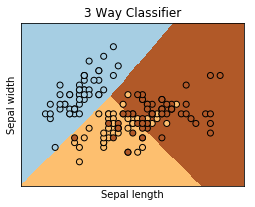

In [10]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('3 Way Classifier')
plt.show()

<details>
<summary>Explanation of Graph</summary>
<p>The graph above plots each flower as a point with its x-coordinate corresponding to its Sepal Length, and its y-coordinate corresponding with its Sepal width. The lines between the colored sections of the graph represent the model's estimate of the division between the categories. According to the model, points in the blue part of the graph correspond to flowers we would classify as Setosa flowers, points in the tan part of the graph correspond to flowers we would classify as Virginica flowers, and points in the dark brown part of the graph correspond to flowers we would classify as Versicolour flowers. The actual data points are plotted, with a points color corresponding to its label.</p></details>

##### Clipper's Model Deployers

One of Clipper's goals - to make it simple to deploy and maintain machine-learning models in production - is aided by the use of Docker, which makes it easy to include all of a model's dependencies in a self-contained environment. To make the model deployment process even simpler, Clipper provides a library of model deployers for common types of models, while still supporting custom model deployers.

<details>
<summary> More information on Model Deployers</summary>
<div class="text_cell_render rendered_html" tabindex="-1"><p>One of the goals of Clipper is to make it simple to deploy and maintain machine-learning models in production. The prediction interface that models must implement is very simple, consisting of a single function. And the use of Docker makes it easy to include all of a model's dependencies in a self-contained environment. However, deploying a new type of model still entails writing and debugging a new model container and creating a Docker image.
To make the model deployment process even simpler, Clipper provides a library of model deployers for common types of models. If your model can be deployed with one of these deployers, you no longer need to write a model container, create a Docker image, or even figure out how to save a model. Instead, you provide your trained model directly to the model deployer function within your Python process. The model deployer takes care of saving the model and building a Docker image that is compatible with your model type.</p>
<p>Clipper provides model deployers for many common ML packages including PySpark, PyTorch, TensorFlow, etc. In addition, Clipper provides a Python model deployer that can deploy arbitrary Python functions as long as they can be pickled. Finally, if none of these fit your needs, you can always write a custom model container that can execute arbitrary code.</p>
<p>To keep the base images small, Clipper model containers install only the required dependencies to ensure that a basic model will run. However, if your model requires custom Python packages installed, you can specify these additional packages to the model deployer and it will automatically use Pip to install them inside your model's Docker container. You will use this to install Scikit-Learn when you deploy the flower model.</p>
<p>For more information about model deployers, check out the <a href="http://docs.clipper.ai/en/v0.3.0/model_deployers.html" target="_blank">documentation</a>.</p>
</div>
</details>

##### Define a prediction function

Now you have a model that takes an array of length 2 as input -- a petal width and a sepal length -- and returns a flower label. Before you can deploy the model using the Python model deployer, you need to wrap that model in a function that conforms to Clipper's prediction interface.

Define a `predict_flower` function below that takes a list of inputs and returns their predicted labels as strings.

<details>
<summary>Performance and System Notes</summary>
<p>To improve performance during inference, many machine learning models exploit opportunities for data parallelism in the inference process. Because of this, Clipper tries to provide multiple inputs at once to a deployed model. Therefore, models deployed to Clipper must have a function interface that takes a list of inputs as an argument and returns a list of predictions as strings. Returning predictions as strings provides a lot of flexibility over what your models can return. Commonly, models in Clipper will return either a single number (such as a label or score) or JSON containing a richer representation of the model output (for example, by including confidence estimates of predicted labels).</p></details>

**CAUTION**: The following cell contains a `FIXME`.

In [ ]:
def get_label_from_class(l):
    if l == 0:
        return 'Setosa'
    elif l == 1:
        return 'Virginica'
    else:
        return 'Versicolour'


def predict_flowers(flowers):
    labels = "FIXME" # TODO: Use the model to make predict labels
    return [get_label_from_class(l) for l in labels]

<details>
<summary>**Solution:**</summary>
<code class="cm-s-ipython language-python"><span class="cm-keyword">&emsp;&emsp;def</span> <span class="cm-def">predict_flowers</span>(<span class="cm-variable">flowers</span>):
    <span class="cm-variable">&emsp;&emsp;labels</span> = <span class="cm-variable">model</span>.<span class="cm-property">predict</span>(<span class="cm-variable">flowers</span>)
    <span class="cm-keyword">&emsp;&emsp;return</span> [<span class="cm-variable">get_label_from_class</span>(<span class="cm-variable">l</span>) <span class="cm-keyword">for</span> <span class="cm-variable">l</span> <span class="cm-keyword">in</span> <span class="cm-variable">labels</span>]
</code></details>

Execute the following cell to test your function:

In [ ]:
assert predict_flowers([X[0], X[101]]) == ['Setosa', 'Virginica']

Now you can use the Python model deployer to deploy your model to Clipper. The following cell may take a few seconds to run.

In [ ]:
from clipper_admin.deployers import python as python_deployer
python_deployer.deploy_python_closure(
    clipper_conn,
    name="flowercat",  # The name of the model in Clipper
    version=1,  # A unique identifier to assign to this model.
    input_type="floats",  # The type of data the model function expects as input
    func=predict_flowers, # The model function to deploy
    pkgs_to_install=['scipy', 'scikit-learn'] # Packages to install in the new container. Must be a list
)

Clipper deploys each model in its own Docker container. After deploying the model, Clipper uses the DockerContainerManager to start a container for this model and create an RPC connection with the Clipper query frontend, as illustrated below (the changes to the cluster are highlighted in red).

> *Once again, Clipper must download a Docker container from the internet the first time this command is run.*

<img src="notebook-images/deploy_model.png" width="50%" height="50%" />

If you list the Clipper containers again, you can see the container running your flower categorizer model.

In [ ]:
!docker ps --filter label=ai.clipper.container.label

<details><summary><strong>**A Note About Types [Optional]**</strong></summary>
<div class="text_cell_render rendered_html" tabindex="-1"><p>When you deploy models and register applications, you must specify the input type that the model or application expects. The type that you specify has implications for how Clipper manages input serialization and deserialization. From the user's perspective, the input type affects the behavior of Clipper in two places. In the "input" field of the request JSON body, applications will reject requests where the value of that field is the wrong type. And the deployed model function will be called with a list of inputs of the specified type.</p>
<p>The input type can be one of the following types:</p>
<ul>
<li>"ints": The value of the "input" field in a request must be a JSON list of ints. The model function will be called with a list of numpy arrays of type numpy.int.</li>
<li>"floats": The value of the "input" field in a request must be a JSON list of doubles. The model function will be called with a list of numpy arrays of type numpy.float32.</li>
<li>"doubles": The value of the "input" field in a request must be a JSON list of doubles. The model function will be called with a list of numpy arrays of type numpy.float64.</li>
<li>"bytes": The value of the "input" field in a request must be a Base64 encoded string. The model function will be called with a list of numpy arrays of type numpy.int8.</li>
<li>"strings": The value of the "input" field in a request must be a string. The model function will be called with a list of strings.</li>
</ul>
</div>
</details>

#### Registering an Application
You've now deployed a model to Clipper, but you don't have any way to query it yet. Instead of automatically creating a REST endpoint when you deploy a model, Clipper introduces a layer of indirection: the application. Clients query a specific application in Clipper, and the application routes the query to the correct model.

<details>
<summary>API and Benefits</summary>
<div class="text_cell_render rendered_html" tabindex="-1"><p>One advantage of this choice is it decouples endpoint versioning from model versioning, enabling data scientists to rapidly iterate and update models without stopping or modifying a live application.</p>
<p>A single Clipper cluster can have many applications registered and many models deployed at once.</p>
<p>When you register an application you configure certain elements of the application's behavior. These include:</p>
<ul>
<li>The name to give the REST endpoint.</li>
<li>The input type that the application expects (Clipper will ensure applications only route requests to models with matching input types).</li>
<li>The latency service level objective (SLO) specified in microseconds. Clipper will manage how it schedules and routes queries for an application based on the specified latency SLO. For example, Clipper uses the specified SLO to configure its batching behavior to balance maximizing resource utilization by using larger batches with ensuring that SLOs can be met. In addition, Clipper will respond to requests by the end of the specified SLO with a default response if it has not received a prediction back from the model yet.</li>
<li>The default output: Clipper will respond with the default output to requests if a real prediction isn't available by the end of the service level objective.</li>
</ul>
<p><img src="notebook-images/register_app.png" width="50%" height="50%"></p>
<p>Register an application to query your classifier:</p>
</div>
</details>

In [ ]:
clipper_conn.register_application(
    name="flowercat-app",
    input_type="floats",
    default_output="Default",
    slo_micros=100000)

When you register an application with Clipper, it creates a REST endpoint for that application:

```
URL: /<app_name>/predict
Method: POST
Data Params: {"input": <input>}
```

If you want to send several inputs at once, you can batch them into a single request by providing a JSON object with the key `input_batch`. Note that this is separate from Clipper's internal batching mechanism, which will be used regardless of whether the inputs are provided in a single REST request or separate requests.

```
URL: /<app_name>/predict
Method: POST
Data Params: {"input_batch": <input_batch>}
```

Try querying the newly created application.

In [ ]:
import requests, json
response = requests.post(
     "http://%s/%s/predict" % (clipper_addr, 'flowercat-app'),
     headers={"Content-type": "application/json"},
     data=json.dumps({
         'input': list(X[0]),
     }))
result = response.json()
result

You should see that your application returned the default output of "Default". This is because even though you have deployed a model and registered an application, you have not told Clipper to route requests from the "flowercat-app" application to the "flowercat" model.

You can do this by linking the model to the application.

<img src="notebook-images/link_model.png" width="50%" height="50%" />

In [ ]:
clipper_conn.link_model_to_app(app_name="flowercat-app", model_name="flowercat")

When you query the "flowercat-app" endpoint again, Clipper should return a predicted label. Try it with your own input.

**CAUTION**: The following cell contains a `FIXME`.

In [ ]:
response = requests.post(
     "http://%s/%s/predict" % (clipper_addr, 'flowercat-app'),
     headers={"Content-type": "application/json"},
     data=json.dumps({
         'input': "FIXME", # TODO: Specify an input
     }))
result = response.json()
result

<details>
<summary>**Solution:**</summary>
<code class="cm-s-ipython language-python"><span class="cm-variable">&emsp;&emsp;response</span> = <span class="cm-variable">requests</span>.<span class="cm-property">post</span>(
     <span class="cm-string">&emsp;&emsp;<a style="text-decoration:none;color:red" class="cm-string">"http://%s/%s/predict"</a></span> <span class="cm-operator">%</span> (<span class="cm-variable">clipper_addr</span>, <span class="cm-string">'flowercat-app'</span>),
     <span class="cm-variable">&emsp;&emsp;headers</span>={<span class="cm-string">"Content-type"</span>: <span class="cm-string">"application/json"</span>},
     <span class="cm-variable">&emsp;&emsp;data</span>=<span class="cm-variable">json</span>.<span class="cm-property">dumps</span>({
         <span class="cm-string">&emsp;&emsp;'input'</span>: <span class="cm-builtin">list</span>(<span class="cm-variable">X</span>[<span class="cm-number">0</span>]), <span class="cm-comment"># TODO: Specify an input</span>
     &emsp;&emsp;}))
<span class="cm-variable">&emsp;&emsp;result</span> = <span class="cm-variable">response</span>.<span class="cm-property">json</span>()
<span class="cm-variable">&emsp;&emsp;result</span>
</code>
</details>

#### Inspecting Clipper
The ClipperConnection object has several methods to inspect various aspects of the Clipper cluster.

You can list all of the applications.

In [ ]:
clipper_conn.get_all_apps(verbose=True)

Or all of the models.

In [ ]:
clipper_conn.get_all_models(verbose=True)

You can also fetch the raw container logs from all of the Clipper docker containers. The command will print the paths to the log files for further examination. You can figure out which logs belong to which container based on the unique Docker container ID in the log filename.

In [ ]:
clipper_conn.get_clipper_logs()

#### Updating the Model
Machine learning models are rarely static. Instead, data science tends to be an iterative process, with new and improved models being developed over time. Clipper supports this workflow by letting you deploy new versions of models, and automatically routing requests to them.

Create a new version of the "flowercat" model that returns the probabilities that an input is in each class instead.

> *Hint: Check out the [Scikit-Learn Logistic Regression documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba).*

<details>
<summary>More information</summary><p>
If you look back to where you linked your flowercat model to the application, you'll see that there is no mention of versioning in that method call. Instead, when a new version of a model is deployed, Clipper will automatically start routing requests to the new version.</p>
</details>

**CAUTION**: The following cell contains a `FIXME`.

In [ ]:
def predict_flower_probabilities(flowers):
    # TODO: Return the predicted probabilities.
    return "FIXME"

<details>
<summary>**Solution:**</summary>
<code>
    <strong><span style="color:green">def</span></strong> <span style="color:blue">predict_flower_probabilities</span>(flowers):
        <strong><span style="color:green">return</span></strong> model.predict_proba(flowers)
</code>
</details>

In [ ]:
predict_flower_probabilities([X[0]])

Deploy this new version of the function as version "2". For this application, you are using a numeric versioning scheme. But Clipper simply treats versions as unique string identifiers, so you could use other versioning schemes (such as Git hashes or semantic versioning). Versions don't even have to be ordered, Clipper just tracks the currently active version.

<img src="notebook-images/update_model.png" width="50%" height="50%" />

The following cell may take a few seconds to run.

In [ ]:
python_deployer.deploy_python_closure(
    clipper_conn,
    name="flowercat",
    version=2, # Note that you are specifying a new version
    input_type="floats",
    func=predict_flower_probabilities, # The new predict function
    pkgs_to_install=['scipy', 'scikit-learn']
)

In [ ]:
response = requests.post(
     "http://%s/%s/predict" % (clipper_addr, 'flowercat-app'),
     headers={"Content-type": "application/json"},
     data=json.dumps({
         'input': list(X[0]),
     }))
result = response.json()
result

Sometimes the "new and improved" model is not actually improved. If you deploy a model that isn't working well, you can roll back to any previous version. This just changes which version of the model the application routes requests to.

<img src="notebook-images/rollback_version.png" width="50%" height="50%" />


In [ ]:
clipper_conn.set_model_version(name="flowercat", version=1)

In [ ]:
response = requests.post(
     "http://%s/%s/predict" % (clipper_addr, 'flowercat-app'),
     headers={"Content-type": "application/json"},
     data=json.dumps({
         'input': list(X[0]),
     }))
result = response.json()
result

#### Adding Model Replicas
Many machine learning models are computationally expensive and a single instance of the model may not meet the throughput demands of a serving workload. To increase prediction throughput, you can horizontally scale the application by creating additional model replicas. This creates additional Docker containers running the same model. Clipper will automatically load-balance requests across the set of available model replicas.

Set the number of replicas for the currently active version (1) of the "flowercat" model to 4.

<img src="notebook-images/add_replicas.png" width="50%" height="50%" />

In [ ]:
clipper_conn.set_num_replicas("flowercat", num_replicas=5)

If you list the Clipper Docker containers, you should now see five containers based on the image "flowercat:1".

In [ ]:
!docker ps --filter label=ai.clipper.container.label

If you want to reduce the number of replicas of a model to free up hardware resource, you can use the same command.

Set the number of replicas for "flowercat" back to 1.

<img src="notebook-images/set_replicas.png" width="50%" height="50%" />

In [ ]:
clipper_conn.set_num_replicas("flowercat", num_replicas=1)

In [ ]:
!docker ps --filter label=ai.clipper.container.label

Congratulations! You have finished part 1 of the tutorial. Please move on to [part 2](2-Example-App.ipynb) to deploy example computer vision application. 